In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional

In [5]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Seoul_Temp.csv'
temp = pd.read_csv(url)
temp.head()

,date,avg,min,max
0,2011-01-01,-6.8,-10.4,-2.9
1,2011-01-02,-5.4,-8.5,-1.2
2,2011-01-03,-4.5,-8.5,-0.3
3,2011-01-04,-3.9,-7.4,-1.7
4,2011-01-05,-4.0,-7.7,-1.8


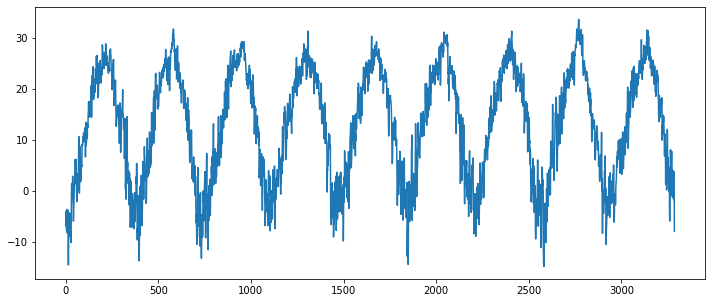

In [6]:
temp_data = temp[['avg']]

plt.figure(figsize=(12,5))
plt.plot(temp_data)
plt.show()

In [7]:
scaler = MinMaxScaler(feature_range=(-1,1))
temp_data = scaler.fit_transform(temp_data)

In [8]:
train = temp_data[:2557]
test = temp_data[2557:]

In [11]:
def create_dataset(time_data, look_back = 1):
  data_X, data_y = [], []

  for i in range(len(time_data) - look_back):
    data_X.append(time_data[i:(i+look_back), 0])
    data_y.append(time_data[i+look_back, 0])

  return np.array(data_X), np.array(data_y)

In [12]:
look_back = 180

train_X, train_y = create_dataset(train, look_back)
test_X, test_y = create_dataset(test, look_back)

In [13]:
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((2377, 180, 1), (2377,), (550, 180, 1), (550,))

In [14]:
model = Sequential()
model.add(Bidirectional(LSTM(64,input_shape = (None, 1))))
model.add(Dense(1, activation = 'tanh'))

model.compile(loss='mse', optimizer = 'adam')

In [15]:
%%time
hist = model.fit(train_X, train_y, epochs=200, batch_size=16, validation_data=(test_X, test_y))

Epoch 1/200
149/149 [==============================] - 35s 20ms/step - loss: 0.0352 - val_loss: 0.0148
Epoch 2/200
149/149 [==============================] - 2s 16ms/step - loss: 0.0147 - val_loss: 0.0133
Epoch 3/200
149/149 [==============================] - 2s 16ms/step - loss: 0.0145 - val_loss: 0.0122
Epoch 4/200
149/149 [==============================] - 2s 16ms/step - loss: 0.0134 - val_loss: 0.0104
Epoch 5/200
149/149 [==============================] - 2s 16ms/step - loss: 0.0119 - val_loss: 0.0094
Epoch 6/200
149/149 [==============================] - 2s 16ms/step - loss: 0.0098 - val_loss: 0.0085
Epoch 7/200
149/149 [==============================] - 2s 16ms/step - loss: 0.0091 - val_loss: 0.0077
Epoch 8/200
149/149 [==============================] - 2s 16ms/step - loss: 0.0089 - val_loss: 0.0076
Epoch 9/200
149/149 [==============================] - 2s 16ms/step - loss: 0.0087 - val_loss: 0.0077
Epoch 10/200
149/149 [==============================] - 2s 16ms/step - loss: 0.00

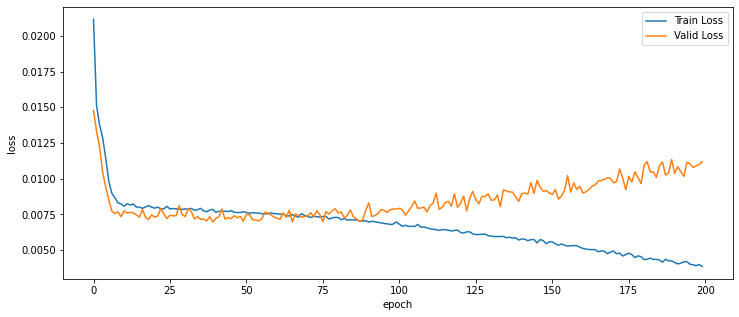

In [16]:
plt.figure(figsize = (12, 5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train Loss', 'Valid Loss'], loc = 'upper right')
plt.show()

In [17]:
trainScore = model.evaluate(train_X, train_y, verbose = 0)
print('Train Score: ', trainScore)
testScore = model.evaluate(test_X, test_y, verbose = 0)
print('Test Score: ', testScore)

Train Score:  0.003729406977072358
Test Score:  0.011185910552740097


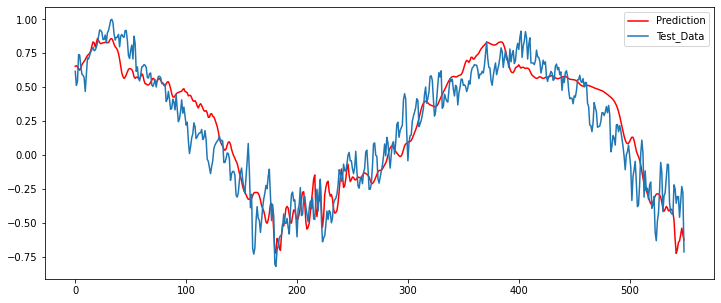

In [18]:
look_ahead =550

xhat = test_X[0]

predictions = np.zeros((look_ahead,1))

for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=1)
  predictions[i] = prediction
  xhat= np.vstack([xhat[1:], prediction])

plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='Prediction')
plt.plot(np.arange(look_ahead), test_y[:look_ahead], label='Test_Data')
plt.legend()
plt.show()
               